In [2]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

In [3]:
image_data = nib.load('../../images/1/FLAIR.nii.gz')

FileNotFoundError: No such file or no access: '../images/1/FLAIR.nii.gz'

In [19]:
image = image_data.get_fdata()

In [20]:
origin_x = 100
origin_y = 100
origin_z = 1
x = 1
y = 1
z = 1
valor_medio_cluster = image[origin_x, origin_y, 20]
tol = 50
segmentation = np.zeros_like(image)
itera = 1
point = [origin_x,origin_y]
tail = [point]
evaluated = image == True

while True:
  punto = tail.pop(0)

  print(len(tail))
  
  for dx in [-x, 0, x] :
    for dy in [-y, 0, y] :
      nuevoPunto = [punto[0]+dx, punto[1]+dy]
      if((nuevoPunto[0] < 230) and ((nuevoPunto[0]) > 0) and (nuevoPunto[1] < 230) and ((nuevoPunto[1]) > 0) ):
        if (not evaluated[nuevoPunto[0], nuevoPunto[1],20]):
          if np.abs(valor_medio_cluster - image[nuevoPunto[0], nuevoPunto[1], 20]) < tol :
              segmentation[nuevoPunto[0], nuevoPunto[1], 20] = 1
              tail.append([nuevoPunto[0], nuevoPunto[1]])
              evaluated[nuevoPunto[0], nuevoPunto[1], 20] = True
              evaluated[punto[0], punto[1], 20] = True
          else :
              segmentation[nuevoPunto[0], nuevoPunto[1], 20] = 0
              tail.append([nuevoPunto[0], nuevoPunto[1]])
              evaluated[nuevoPunto[0], nuevoPunto[1], 20] = True
              evaluated[punto[0], punto[1], 20] = True


  valor_medio_cluster = image[segmentation == 1].mean()

  

  # x += 1
  # y += 1
  # z += 1
  if len(tail) == 0:
    break
    




0
7
11
11
13
13
13
15
15
15
19
19
19
19
19
19
21
21
21
21
21
23
23
23
23
23
27
27
27
27
27
27
27
27
27
27
29
29
29
29
29
29
29
31
31
31
31
31
31
31
35
35
35
35
35
35
35
35
35
35
35
35
35
35
37
37
37
37
37
37
37
37
37
39
39
39
39
39
39
39
39
39
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
45
45
45
45
45
45
45
45
45
45
45
47
47
47
47
47
47
47
47
47
47
47
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
53
53
53
53
53
53
53
53
53
53
53
53
53
55
55
55
55
55
55
55
55
55
55
55
55
55
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69
71
71
71
71
71
71
71
71
71
71
71
71
71
71
71
71
71
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
77
77
77
77
77
77
77
77
77
77


In [1]:
from queue import Queue

def region_growing(image, seed, threshold):

    # Initialize the segmentation
    segmentation = np.zeros_like(image)
    
    # Initialize the queue with the seed point
    q = Queue()
    q.put(seed)
    
    while not q.empty():
        # Get the next point from the queue
        x, y, z = q.get()
        
        # Check if the point is within the threshold
        if abs(image[x, y, z] - image[seed]) <= threshold:
            # Add the point to the segmentation
            segmentation[x, y, z] = 1
            
            # Add the neighbors to the queue
            for dx in [-1, 0, 1]:
                for dy in [-1, 0, 1]:
                    for dz in [-1, 0, 1]:
                        if dx == dy == dz == 0:
                            continue
                        
                        nx = x + dx
                        ny = y + dy
                        nz = z + dz
                        
                        if nx >= 0 and nx < image.shape[0] and ny >= 0 and ny < image.shape[1] and nz >= 0 and nz < image.shape[2]:
                            q.put((nx, ny, nz))
        print(q)
    
region_growing(image, seed=(100,100,20), threshold=20)

NameError: name 'image' is not defined

In [21]:
image.shape

(240, 240, 48)

In [22]:
print(segmentation[0:3, 0:3, 0:3])

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


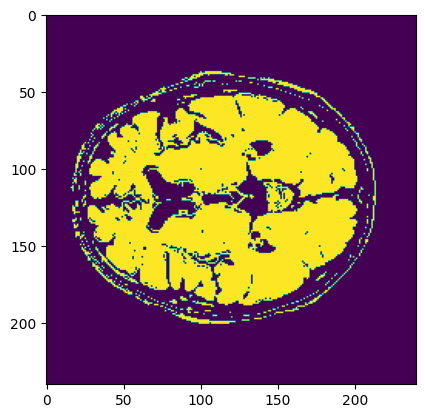

In [23]:
# plt.imshow(image[:, :, 100])
plt.imshow(segmentation[:, :, 20])